<a href="https://colab.research.google.com/github/noushin94/DETR_-polypdetection_hugging_face_public/blob/main/polypdetectionpycharm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Fri Apr 19 09:47:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install -i https://test.pypi.org/simple/ supervision==0.3.0
!pip install -q transformers
!pip install -q pytorch-lightning
!pip install -q roboflow
!pip install -q timm

Looking in indexes: https://test.pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.3 MB/s eta 0:00:00


In [5]:
import pytorch_lightning
print(pytorch_lightning.__version__)

2.2.2


In [6]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

import roboflow
import supervision
import transformers
import pytorch_lightning

print(
    "roboflow:", roboflow.__version__,
    "; supervision:", supervision.__version__,
    "; transformers:", transformers.__version__,
    "; pytorch_lightning:", pytorch_lightning.__version__
)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.2 ; cuda:  cu121
roboflow: 1.1.27 ; supervision: 0.3.0 ; transformers: 4.38.2 ; pytorch_lightning: 2.2.2


#  Load Model

In [7]:
import torch
from transformers import DetrForObjectDetection, DetrImageProcessor


# settings
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
CHECKPOINT = 'facebook/detr-resnet-50'
CONFIDENCE_TRESHOLD = 0.5
IOU_TRESHOLD = 0.8

image_processor = DetrImageProcessor.from_pretrained(CHECKPOINT, size = (640,640))
model = DetrForObjectDetection.from_pretrained(CHECKPOINT)
model.to(DEVICE)


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sOF3UhHfQo15JTCbVhZb")
project = rf.workspace("fyp-v6rcp").project("kvasir-kqkfx")
version = project.version(1)
dataset = version.download("coco")





loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to kvasir-1 in coco:: 100%|██████████| 1005/1005 [00:00<00:00, 6992.11it/s]


In [9]:
#preparing custom dataset
import os
import torchvision
main_directory = "/content/kvasir-1"

# settings
ANNOTATION_FILE_NAME = "_annotations.coco.json"
TRAIN_DIRECTORY = os.path.join(main_directory, "train")
VAL_DIRECTORY = os.path.join(main_directory, "valid")
TEST_DIRECTORY = os.path.join(main_directory, "test")



class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(
        self,
        image_directory_path: str,
        image_processor,
        train: bool = True
    ):
        annotation_file_path = os.path.join(image_directory_path, ANNOTATION_FILE_NAME)
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        images, annotations = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        annotations = {'image_id': image_id, 'annotations': annotations}
        encoding = self.image_processor(images=images, annotations=annotations, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]

        return pixel_values, target


TRAIN_DATASET = CocoDetection(
    image_directory_path=TRAIN_DIRECTORY,
    image_processor=image_processor,
    train=True)
VAL_DATASET = CocoDetection(
    image_directory_path=VAL_DIRECTORY,
    image_processor=image_processor,
    train=False)
TEST_DATASET = CocoDetection(
    image_directory_path=TEST_DIRECTORY,
    image_processor=image_processor,
    train=False)

print("Number of training examples:", len(TRAIN_DATASET))
print("Number of validation examples:", len(VAL_DATASET))
print("Number of test examples:", len(TEST_DATASET))


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Number of training examples: 698
Number of validation examples: 198
Number of test examples: 101


Image #633


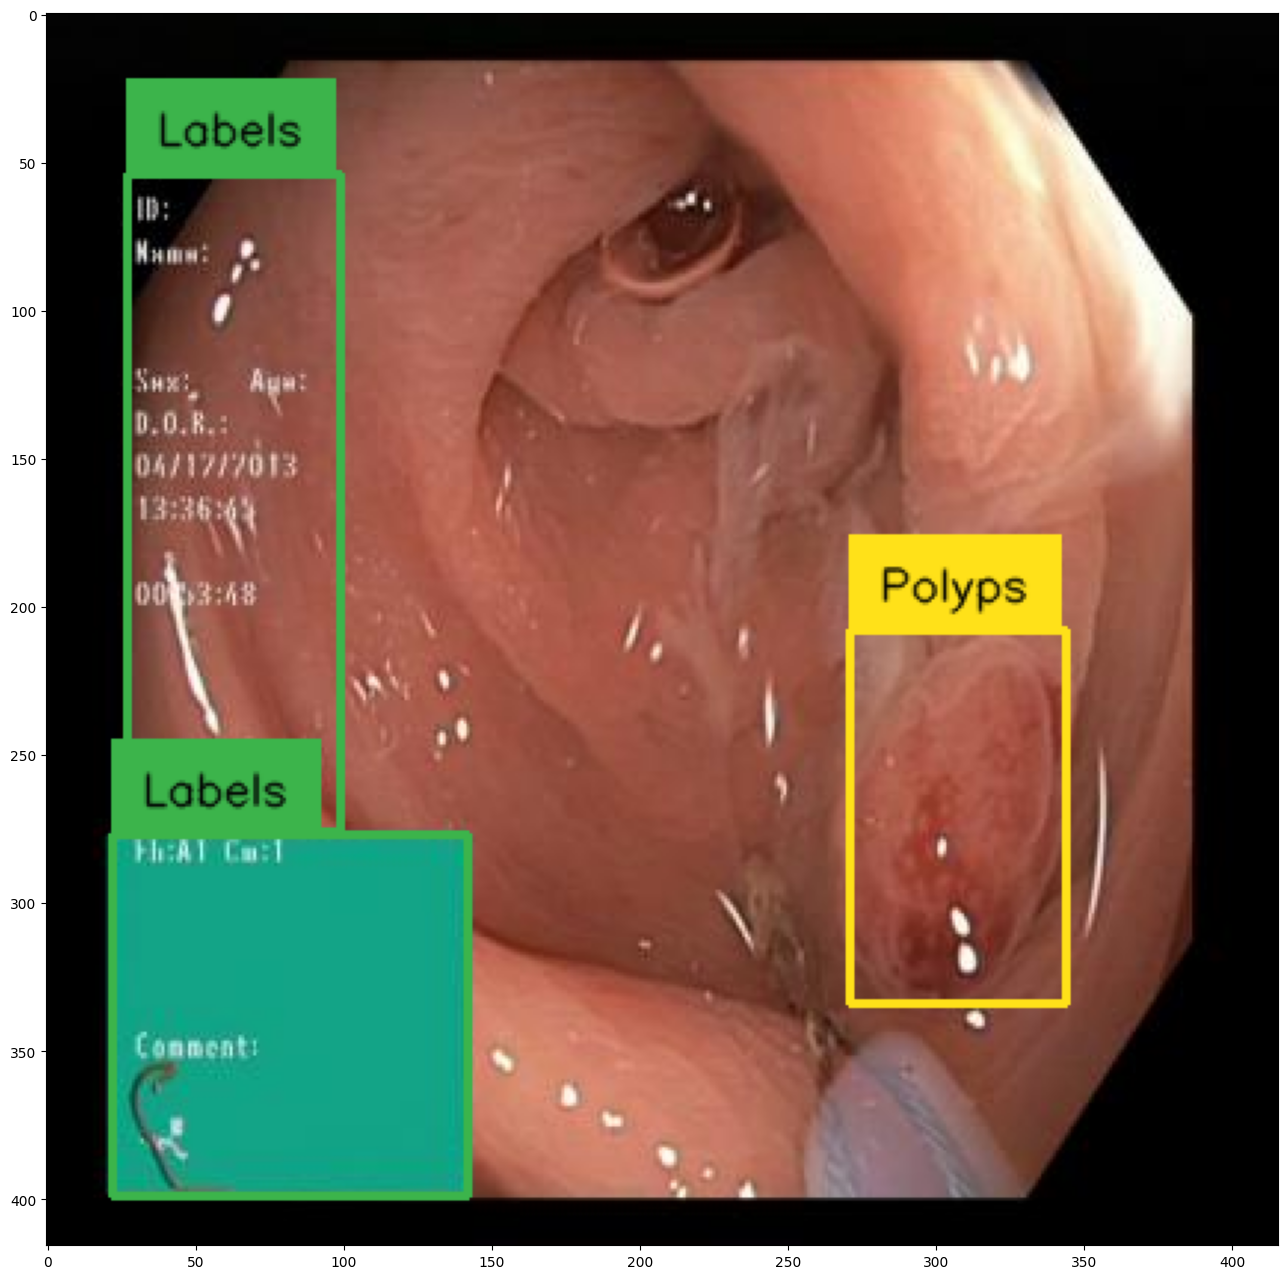

In [10]:
import random
import cv2
import numpy as np
import torch
import supervision as sv


# select random image
image_ids = TRAIN_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TRAIN_DATASET.coco.loadImgs(image_id)[0]
annotations = TRAIN_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TRAIN_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# annotate
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

# we will use id2label function for training
categories = TRAIN_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}

labels = [
    f"{id2label[class_id]}"
    for _, _, class_id, _
    in detections
]
box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(image, (16, 16))

In [11]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    # DETR authors employ various image sizes during training, making it not possible
    # to directly batch together images. Hence they pad the images to the biggest
    # resolution in a given batch, and create a corresponding binary pixel_mask
    # which indicates which pixels are real/which are padding

    pixel_values = [item[0] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    return {
        'pixel_values': encoding['pixel_values'],
        'pixel_mask': encoding['pixel_mask'],
        'labels': labels
    }

TRAIN_DATALOADER = DataLoader(dataset=TRAIN_DATASET, collate_fn=collate_fn, batch_size=4, shuffle=True)
VAL_DATALOADER = DataLoader(dataset=VAL_DATASET, collate_fn=collate_fn, batch_size=4)
TEST_DATALOADER = DataLoader(dataset=TEST_DATASET, collate_fn=collate_fn, batch_size=4)

# Train model with PyTorch Lightning

In [12]:
import pytorch_lightning as pl
from transformers import DetrForObjectDetection
import torch


class Detr(pl.LightningModule):

    def __init__(self, lr, lr_backbone, weight_decay):
        super().__init__()
        self.model = DetrForObjectDetection.from_pretrained(
            pretrained_model_name_or_path=CHECKPOINT,
            num_labels=len(id2label),
            ignore_mismatched_sizes=True
        )

        self.lr = lr
        self.lr_backbone = lr_backbone
        self.weight_decay = weight_decay

    def forward(self, pixel_values, pixel_mask):
        print(pixel_values.shape)
        return self.model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    def common_step(self, batch, batch_idx):
        pixel_values = batch["pixel_values"]
        pixel_mask = batch["pixel_mask"]
        labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]

        outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask, labels=labels)

        loss = outputs.loss
        loss_dict = outputs.loss_dict


        return loss, loss_dict

    def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        # logs metrics for each training_step, and the average across the epoch
        self.log("training_loss", loss)
        for k,v in loss_dict.items():
            self.log("train_" + k, v.item())
        #print(f"training Loss: {loss}")
        return loss

    def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        self.log("validation/loss", loss)
        for k, v in loss_dict.items():
            self.log("validation_" + k, v.item())
        print(f"Validation Loss: {loss}")
        return loss

    def configure_optimizers(self):
        # DETR authors decided to use different learning rate for backbone
        # you can learn more about it here:
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L22-L23
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L131-L139
        param_dicts = [
            {
                "params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
            {
                "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                "lr": self.lr_backbone,
            },
        ]
        return torch.optim.AdamW(param_dicts, lr=self.lr, weight_decay=self.weight_decay)

    def train_dataloader(self):
        return TRAIN_DATALOADER

    def val_dataloader(self):
        return VAL_DATALOADER

In [13]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

batch = next(iter(TRAIN_DATALOADER))
outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoin

torch.Size([4, 3, 640, 640])


In [14]:
outputs.logits.shape

torch.Size([4, 100, 4])

In [15]:
from pytorch_lightning import Trainer

%cd {HOME}

# settings
MAX_EPOCHS = 10

# pytorch_lightning < 2.0.0
# trainer = Trainer(gpus=1, max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)

# pytorch_lightning >= 2.0.0
trainer = Trainer(devices=1, accelerator="gpu", max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)

trainer.fit(model)

/content


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                   | Params
-------------------------------------------------
0 | model | DetrForObjectDetection | 41.5 M
-------------------------------------------------
41.3 M    Trainable params
222 K     Non-trainable params
41.5 M    Total params
166.009   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation Loss: 3.733515739440918
Validation Loss: 4.289771556854248


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 1.4595131874084473
Validation Loss: 1.585506796836853
Validation Loss: 1.5832111835479736
Validation Loss: 1.4433974027633667
Validation Loss: 2.190112590789795
Validation Loss: 1.8117231130599976
Validation Loss: 1.4313071966171265
Validation Loss: 1.8626731634140015
Validation Loss: 1.9199585914611816
Validation Loss: 1.459441900253296
Validation Loss: 1.289117693901062
Validation Loss: 1.4242331981658936
Validation Loss: 1.9099072217941284
Validation Loss: 1.1046042442321777
Validation Loss: 1.593139410018921
Validation Loss: 1.3140573501586914
Validation Loss: 1.8035345077514648
Validation Loss: 1.3588955402374268
Validation Loss: 1.435858964920044
Validation Loss: 1.8007490634918213
Validation Loss: 1.6204873323440552
Validation Loss: 1.4768297672271729
Validation Loss: 1.507521152496338
Validation Loss: 1.555208444595337
Validation Loss: 1.347794532775879
Validation Loss: 1.4702486991882324
Validation Loss: 1.8992435932159424
Validation Loss: 1.6221098899841309
V

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 1.2023897171020508
Validation Loss: 1.3143424987792969
Validation Loss: 1.2292098999023438
Validation Loss: 1.3079497814178467
Validation Loss: 1.7752385139465332
Validation Loss: 1.4284844398498535
Validation Loss: 1.355635166168213
Validation Loss: 1.8255633115768433
Validation Loss: 1.4501936435699463
Validation Loss: 1.359908103942871
Validation Loss: 0.989539623260498
Validation Loss: 1.2124581336975098
Validation Loss: 1.6429601907730103
Validation Loss: 0.9575270414352417
Validation Loss: 1.2948882579803467
Validation Loss: 1.1690871715545654
Validation Loss: 1.491464614868164
Validation Loss: 1.0013291835784912
Validation Loss: 1.0753378868103027
Validation Loss: 1.6623066663742065
Validation Loss: 1.2374988794326782
Validation Loss: 1.233978509902954
Validation Loss: 1.3030719757080078
Validation Loss: 1.3590476512908936
Validation Loss: 1.1440176963806152
Validation Loss: 1.1873725652694702
Validation Loss: 1.4954860210418701
Validation Loss: 1.47115182876586

Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 1.1239700317382812
Validation Loss: 1.2621570825576782
Validation Loss: 1.2012181282043457
Validation Loss: 0.9246460199356079
Validation Loss: 1.552142858505249
Validation Loss: 1.4449723958969116
Validation Loss: 1.1612316370010376
Validation Loss: 1.6236200332641602
Validation Loss: 1.2034564018249512
Validation Loss: 1.2012280225753784
Validation Loss: 1.1801962852478027
Validation Loss: 1.1343512535095215
Validation Loss: 1.322477102279663
Validation Loss: 0.753143846988678
Validation Loss: 1.095519781112671
Validation Loss: 1.0001282691955566
Validation Loss: 1.3102905750274658
Validation Loss: 0.8475072979927063
Validation Loss: 0.9173409938812256
Validation Loss: 1.3209763765335083
Validation Loss: 1.0936975479125977
Validation Loss: 1.1307692527770996
Validation Loss: 1.1590181589126587
Validation Loss: 1.1064668893814087
Validation Loss: 1.085566759109497
Validation Loss: 1.0121216773986816
Validation Loss: 1.2455250024795532
Validation Loss: 1.33731472492218

Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 1.0299968719482422
Validation Loss: 1.1051177978515625
Validation Loss: 1.0299266576766968
Validation Loss: 0.8779533505439758
Validation Loss: 1.3646835088729858
Validation Loss: 1.3550056219100952
Validation Loss: 0.95088791847229
Validation Loss: 1.3966431617736816
Validation Loss: 1.2900598049163818
Validation Loss: 1.257354974746704
Validation Loss: 0.7922028303146362
Validation Loss: 1.0035663843154907
Validation Loss: 1.230751872062683
Validation Loss: 1.0846927165985107
Validation Loss: 0.958773136138916
Validation Loss: 0.9860665202140808
Validation Loss: 1.1940268278121948
Validation Loss: 0.6833975315093994
Validation Loss: 0.9239351749420166
Validation Loss: 1.3423166275024414
Validation Loss: 1.074938416481018
Validation Loss: 1.0925023555755615
Validation Loss: 1.0544801950454712
Validation Loss: 1.2732372283935547
Validation Loss: 0.9651695489883423
Validation Loss: 1.0044749975204468
Validation Loss: 1.0028716325759888
Validation Loss: 1.290089011192321

Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 0.8061889410018921
Validation Loss: 1.0284011363983154
Validation Loss: 1.0075076818466187
Validation Loss: 0.7542715072631836
Validation Loss: 1.4723851680755615
Validation Loss: 1.2996037006378174
Validation Loss: 0.8626099824905396
Validation Loss: 1.2824351787567139
Validation Loss: 1.1654655933380127
Validation Loss: 1.0240650177001953
Validation Loss: 0.788092851638794
Validation Loss: 0.7491487264633179
Validation Loss: 1.3110278844833374
Validation Loss: 0.868427038192749
Validation Loss: 0.8996857404708862
Validation Loss: 0.8113062381744385
Validation Loss: 1.186075210571289
Validation Loss: 0.5630506277084351
Validation Loss: 0.7969386577606201
Validation Loss: 1.3185323476791382
Validation Loss: 0.9141577482223511
Validation Loss: 0.9601988792419434
Validation Loss: 1.0035464763641357
Validation Loss: 1.0041115283966064
Validation Loss: 0.839556097984314
Validation Loss: 0.7549364566802979
Validation Loss: 1.0498000383377075
Validation Loss: 1.1268835067749

Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 0.8378268480300903
Validation Loss: 1.0291037559509277
Validation Loss: 0.9618548154830933
Validation Loss: 0.7547804117202759
Validation Loss: 1.2481236457824707
Validation Loss: 1.1169638633728027
Validation Loss: 0.6811452507972717
Validation Loss: 1.1119880676269531
Validation Loss: 1.1527445316314697
Validation Loss: 1.0171033143997192
Validation Loss: 0.845001757144928
Validation Loss: 0.8866273760795593
Validation Loss: 1.2421551942825317
Validation Loss: 0.5796035528182983
Validation Loss: 0.9862575531005859
Validation Loss: 0.6621649265289307
Validation Loss: 1.1111339330673218
Validation Loss: 0.5881130695343018
Validation Loss: 0.8341994285583496
Validation Loss: 1.288447618484497
Validation Loss: 0.8861660957336426
Validation Loss: 0.8495041131973267
Validation Loss: 0.8643960952758789
Validation Loss: 0.8523097038269043
Validation Loss: 0.8464808464050293
Validation Loss: 0.7936035394668579
Validation Loss: 0.8137702345848083
Validation Loss: 1.15391397476

Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 0.7916409969329834
Validation Loss: 1.1188805103302002
Validation Loss: 0.8201432228088379
Validation Loss: 0.7337133884429932
Validation Loss: 1.2949039936065674
Validation Loss: 1.181699275970459
Validation Loss: 0.7286036014556885
Validation Loss: 0.9048037528991699
Validation Loss: 1.1725397109985352
Validation Loss: 1.068031668663025
Validation Loss: 0.6564978361129761
Validation Loss: 0.748627245426178
Validation Loss: 1.1519372463226318
Validation Loss: 0.692368745803833
Validation Loss: 0.852158784866333
Validation Loss: 0.7576313614845276
Validation Loss: 1.0337648391723633
Validation Loss: 0.5513288974761963
Validation Loss: 0.7878021597862244
Validation Loss: 1.1795650720596313
Validation Loss: 0.9176484942436218
Validation Loss: 0.8005009293556213
Validation Loss: 0.9205342531204224
Validation Loss: 0.8701683282852173
Validation Loss: 0.8029762506484985
Validation Loss: 0.780920147895813
Validation Loss: 0.8733157515525818
Validation Loss: 1.174172520637512

Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 0.7738248109817505
Validation Loss: 1.0643128156661987
Validation Loss: 0.9247986674308777
Validation Loss: 0.6780227422714233
Validation Loss: 1.304894208908081
Validation Loss: 1.2568542957305908
Validation Loss: 0.7410690784454346
Validation Loss: 1.097261667251587
Validation Loss: 1.1662511825561523
Validation Loss: 1.111244559288025
Validation Loss: 0.6546064615249634
Validation Loss: 0.7482225298881531
Validation Loss: 1.0939912796020508
Validation Loss: 0.738227367401123
Validation Loss: 0.7677434682846069
Validation Loss: 0.7397831678390503
Validation Loss: 1.0630606412887573
Validation Loss: 0.5460004210472107
Validation Loss: 0.8135793805122375
Validation Loss: 1.2134466171264648
Validation Loss: 0.8977152109146118
Validation Loss: 0.7778950333595276
Validation Loss: 0.86212158203125
Validation Loss: 0.7124997973442078
Validation Loss: 0.8649660348892212
Validation Loss: 0.7639110684394836
Validation Loss: 0.8471298813819885
Validation Loss: 1.187945604324340

Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 0.8052551746368408
Validation Loss: 0.9677134156227112
Validation Loss: 0.8798065185546875
Validation Loss: 0.6583352088928223
Validation Loss: 1.1611073017120361
Validation Loss: 1.1845591068267822
Validation Loss: 0.6533921957015991
Validation Loss: 1.1759192943572998
Validation Loss: 1.099913477897644
Validation Loss: 1.0633635520935059
Validation Loss: 0.6752026081085205
Validation Loss: 0.7919608354568481
Validation Loss: 1.0456366539001465
Validation Loss: 0.6384519338607788
Validation Loss: 0.7696710824966431
Validation Loss: 0.5887885093688965
Validation Loss: 1.029165267944336
Validation Loss: 0.4327896237373352
Validation Loss: 0.6702014207839966
Validation Loss: 1.0401036739349365
Validation Loss: 0.8547908663749695
Validation Loss: 0.7465578317642212
Validation Loss: 0.7593657970428467
Validation Loss: 0.9544517993927002
Validation Loss: 0.7261232137680054
Validation Loss: 0.7355444431304932
Validation Loss: 0.9509639143943787
Validation Loss: 1.16041016578

Validation: |          | 0/? [00:00<?, ?it/s]

Validation Loss: 0.8609472513198853
Validation Loss: 0.9495871067047119
Validation Loss: 0.8477331399917603
Validation Loss: 0.6715502738952637
Validation Loss: 1.1384258270263672
Validation Loss: 1.2421140670776367
Validation Loss: 0.6461275815963745
Validation Loss: 1.1563349962234497
Validation Loss: 1.1867079734802246
Validation Loss: 1.0894447565078735
Validation Loss: 0.6906722784042358
Validation Loss: 0.7567333579063416
Validation Loss: 1.100717306137085
Validation Loss: 0.6446679830551147
Validation Loss: 0.7867425680160522
Validation Loss: 0.6968135833740234
Validation Loss: 1.0514436960220337
Validation Loss: 0.46478039026260376
Validation Loss: 0.7461255788803101
Validation Loss: 1.1900181770324707
Validation Loss: 0.8177134990692139
Validation Loss: 0.7819080352783203
Validation Loss: 0.7060736417770386
Validation Loss: 0.8553652763366699
Validation Loss: 0.7722394466400146
Validation Loss: 0.6995015144348145
Validation Loss: 0.7907825708389282
Validation Loss: 1.053806781

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [16]:
model.to(DEVICE)

Detr(
  (model): DetrForObjectDetection(
    (model): DetrModel(
      (backbone): DetrConvModel(
        (conv_encoder): DetrConvEncoder(
          (model): FeatureListNet(
            (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
            (bn1): DetrFrozenBatchNorm2d()
            (act1): ReLU(inplace=True)
            (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
            (layer1): Sequential(
              (0): Bottleneck(
                (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn1): DetrFrozenBatchNorm2d()
                (act1): ReLU(inplace=True)
                (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn2): DetrFrozenBatchNorm2d()
                (drop_block): Identity()
                (act2): ReLU(inplace=True)
                (aa): Identity()
                (conv3): Conv2d(64, 256

In [ ]:
MODEL_PATH = '/content/drive/MyDrive/Kvasir-SEG/custom-modelRobo70'
model.model.save_pretrained(MODEL_PATH)

 #loading model
model = DetrForObjectDetection.from_pretrained(MODEL_PATH)
model.to(DEVICE)

Some weights of DetrForObjectDetection were not initialized from the model checkpoint at /content/drive/MyDrive/Kvasir-SEG/custom-modelRobo70 and are newly initialized: ['bbox_predictor.layers.0.bias', 'bbox_predictor.layers.0.weight', 'bbox_predictor.layers.1.bias', 'bbox_predictor.layers.1.weight', 'bbox_predictor.layers.2.bias', 'bbox_predictor.layers.2.weight', 'class_labels_classifier.bias', 'class_labels_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

# Inference on test dataset

Let's visualize the predictions of DETR on the first image of the validation set

In [ ]:
!pip install -i https://test.pypi.org/simple/ supervision==0.3.0

Looking in indexes: https://test.pypi.org/simple/


Image #72
ground truth


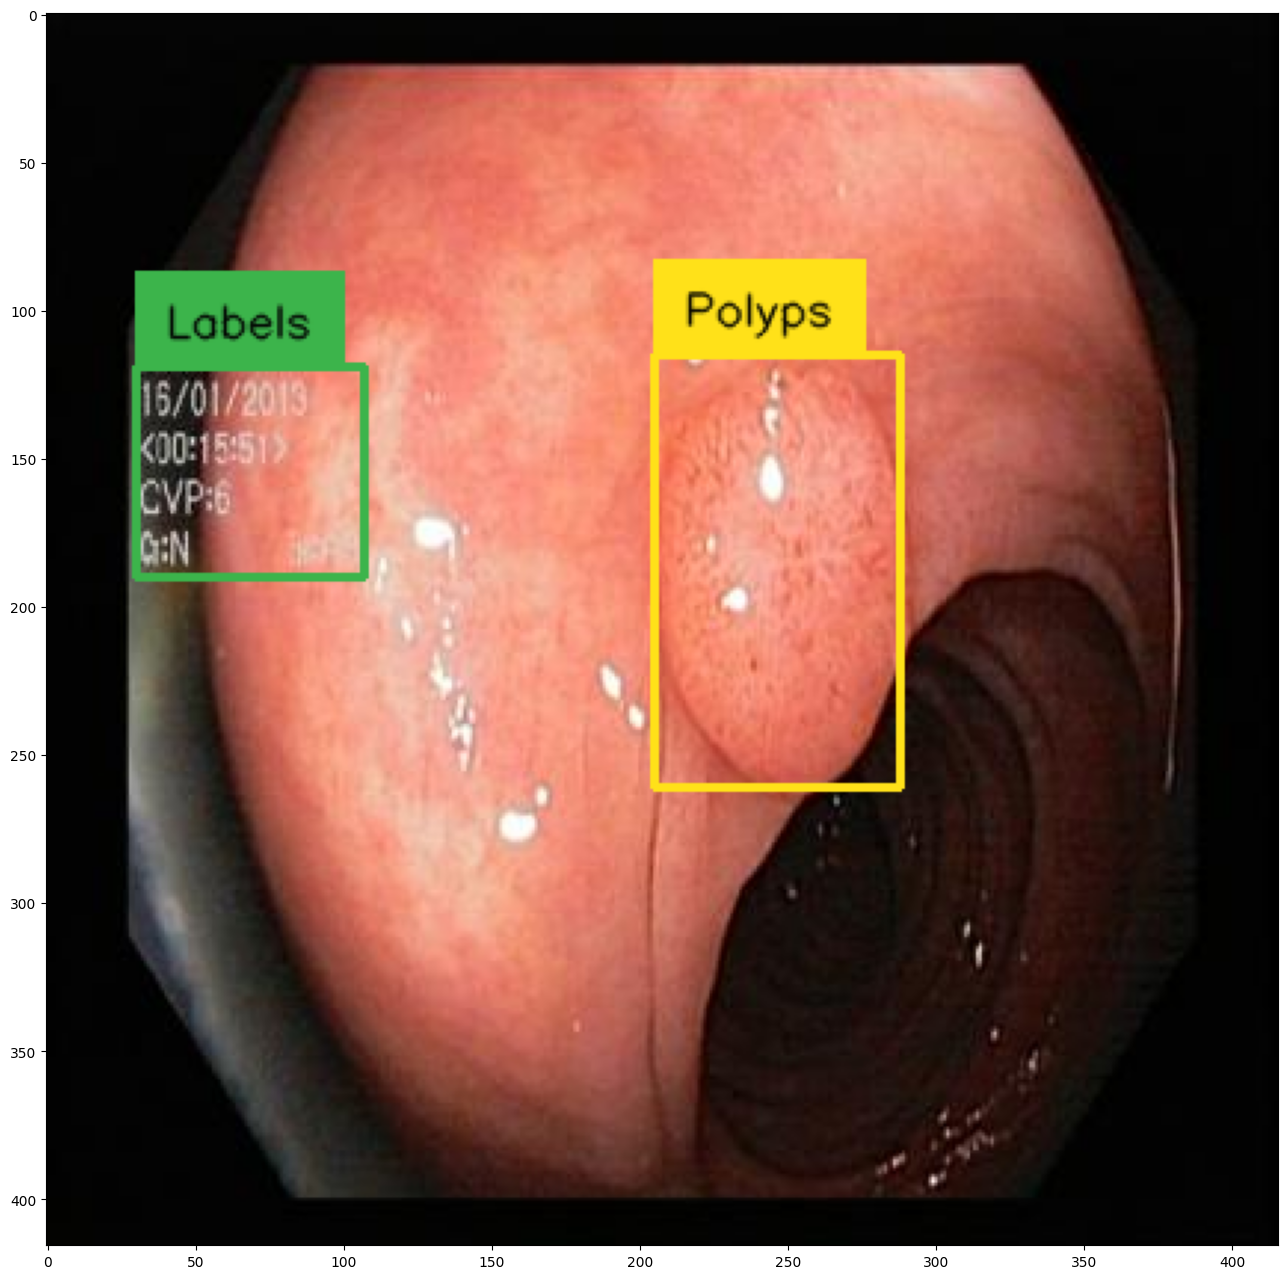

torch.Size([1, 3, 640, 640])
detections


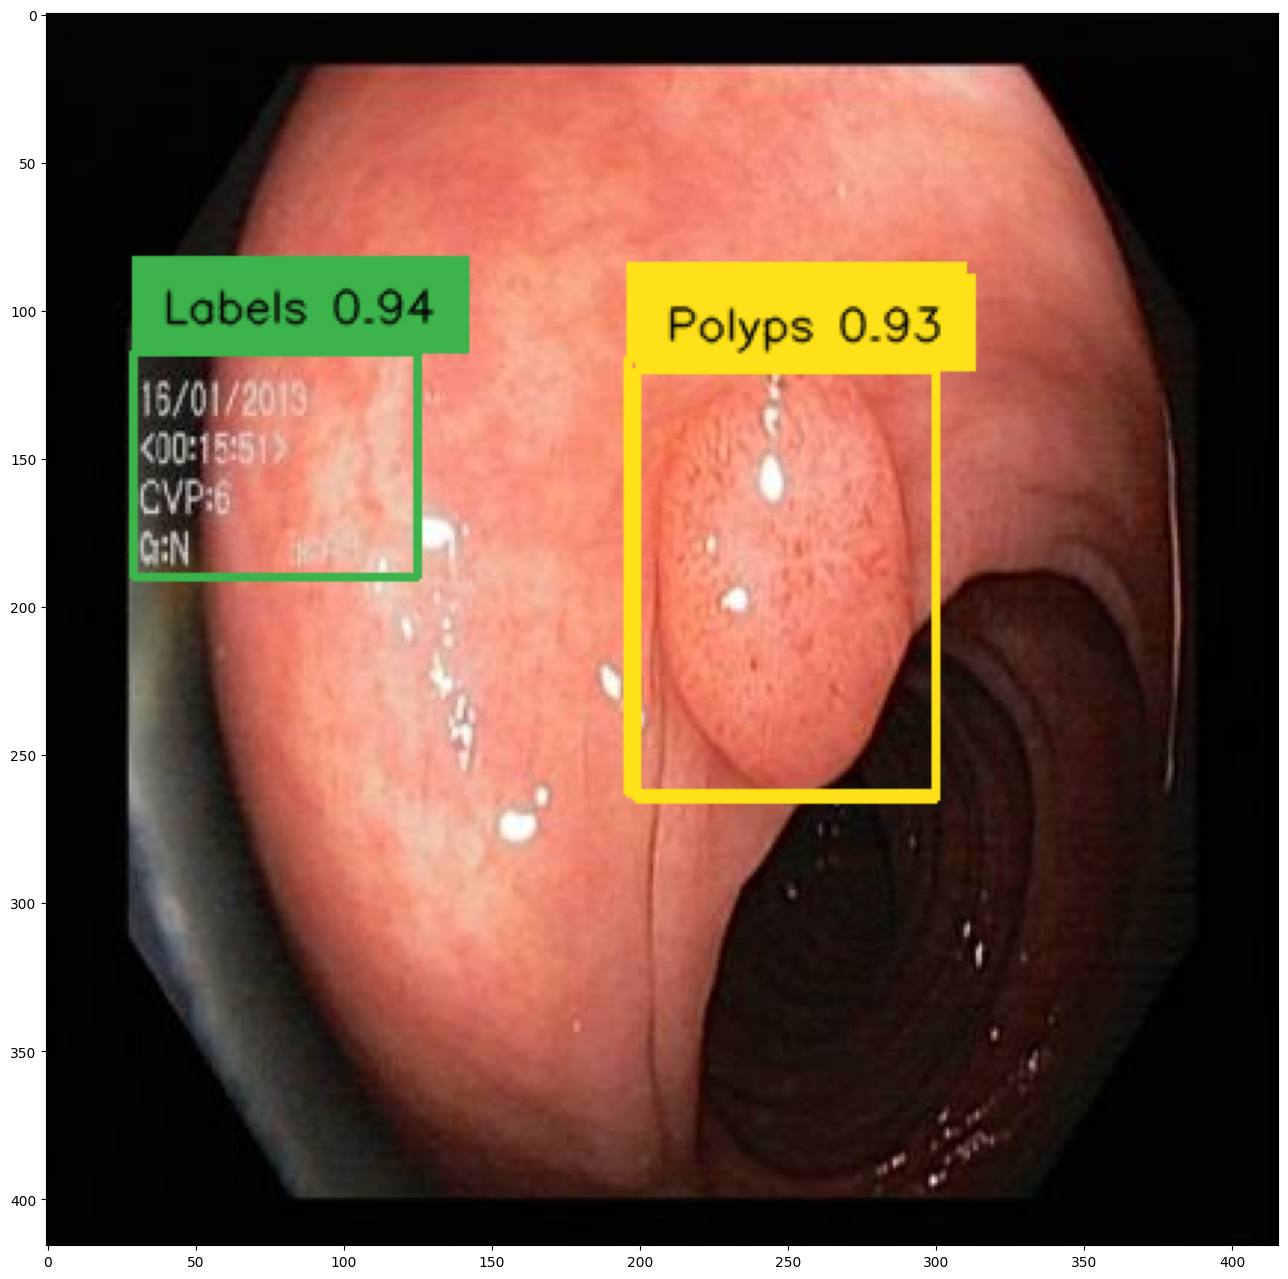

In [17]:
import random
import cv2
import numpy as np


# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = sv.BoxAnnotator()

# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# annotate
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

print('ground truth')
%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

# inference
with torch.no_grad():

    # load image and predict
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=0.1,
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results)
labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]
frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

print('detections')
%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

# Evaluation on test dataset


In [18]:
!pip install -q coco_eval

  Preparing metadata (setup.py) ... done


In [19]:
def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)

def prepare_for_coco_detection(predictions):
    coco_results = []
    for original_id, prediction in predictions.items():
        if len(prediction) == 0:
            continue

        boxes = prediction["boxes"]
        boxes = convert_to_xywh(boxes).tolist()
        scores = prediction["scores"].tolist()
        labels = prediction["labels"].tolist()

        coco_results.extend(
            [
                {
                    "image_id": original_id,
                    "category_id": labels[k],
                    "bbox": box,
                    "score": scores[k],
                }
                for k, box in enumerate(boxes)
            ]
        )
    return coco_results

In [20]:
from coco_eval import CocoEvaluator
from tqdm.notebook import tqdm

import numpy as np

evaluator = CocoEvaluator(coco_gt=TEST_DATASET.coco, iou_types=["bbox"])

print("Running evaluation...")

for idx, batch in enumerate(tqdm(TEST_DATALOADER)):
    pixel_values = batch["pixel_values"].to(DEVICE)
    pixel_mask = batch["pixel_mask"].to(DEVICE)
    labels = [{k: v.to(DEVICE) for k, v in t.items()} for t in batch["labels"]]

    with torch.no_grad():
      outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
    results = image_processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes)

    predictions = {target['image_id'].item(): output for target, output in zip(labels, results)}
    predictions = prepare_for_coco_detection(predictions)
    evaluator.update(predictions)

evaluator.synchronize_between_processes()
evaluator.accumulate()
evaluator.summarize()

Running evaluation...


  0%|          | 0/26 [00:00<?, ?it/s]

torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([4, 3, 640, 640])
torch.Size([1, 3, 640, 640])
Accumulating evaluation results...
DONE (t=0.05s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.503
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.793
 Average Precision